# Lab 3: Bayes Classifier and Boosting

## Import the libraries

In [21]:
import numpy as np
from scipy import misc
from importlib import reload
from labfuns import *
import random

## Assignment 1

In [22]:
def mlParams(X, labels, W=None):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

  # Map each sample to its class index [0..Nclasses-1]
    inv = np.searchsorted(classes, labels.reshape(-1))

    # Counts per class Nk (C x 1 for broadcasting)
    Nk = np.bincount(inv, minlength=Nclasses).astype(float).reshape(Nclasses, 1)

    # Class-wise sums -> means (ML)
    np.add.at(mu, inv, X)
    mu /= Nk

    # Per-class squared deviations -> variances (diagonal ML)
    dif = X - mu[inv]                       # broadcast μ_k to each row
    var_sum = np.zeros((Nclasses, Ndims))
    np.add.at(var_sum, inv, dif * dif)
    var = var_sum / Nk                      # divisor Nk (ML, not Nk-1)

    # Build diagonal covariance matrices
    idx = np.arange(Ndims)
    sigma[:, idx, idx] = var

    return mu, sigma

In [23]:
# 1) Generate test data
X, labels = genBlobs()                

# 2) ML estimates (means and diagonal covariances)
mu, sigma = mlParams(X, labels)

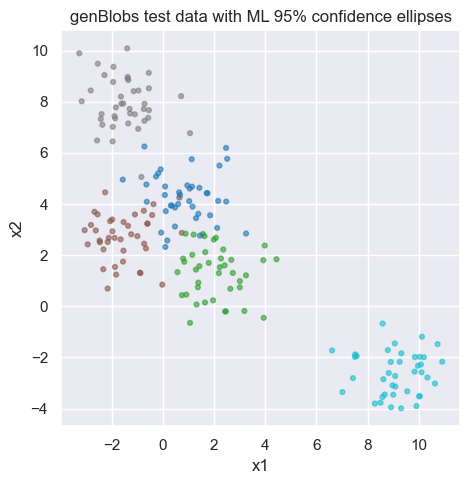

In [24]:
# 3) Plot points + 95% confidence ellipses
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=12, alpha=0.6, cmap='tab10')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("genBlobs test data with ML 95% confidence ellipses")
plt.xlabel("x1"); plt.ylabel("x2")
plt.tight_layout()
plt.show()

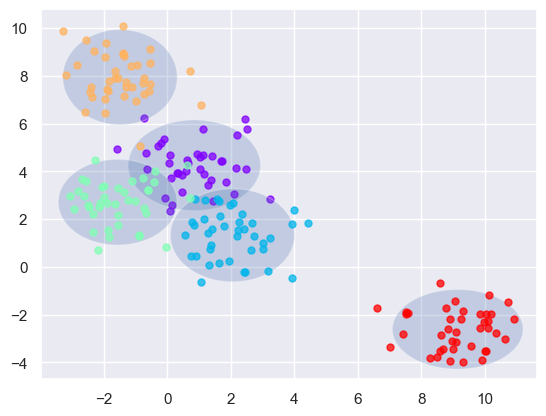

In [25]:
plotGaussian(X,labels,mu,sigma)           # uses 95% CI internally (per the lab)

## Assignment 2